# Visualizzazione Grafici 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Caricamento del dataset pulito
df_clean = pd.read_csv('meteorite_clean.csv')

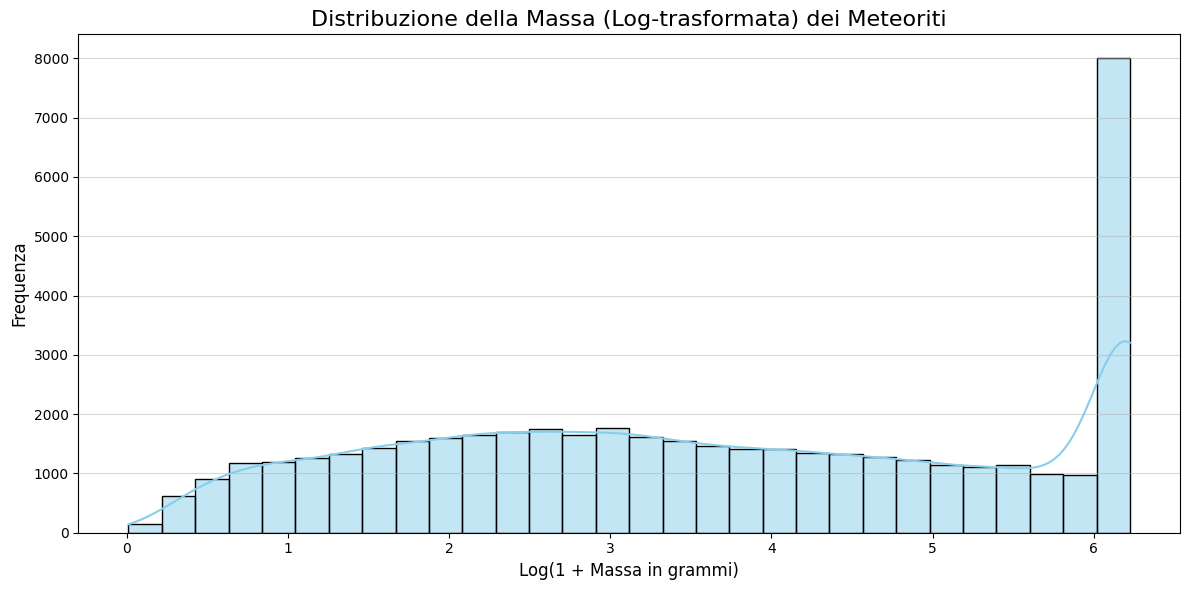

Grafico 1: Distribuzione della Massa salvato come 'meteorite_mass_distribution.png'


In [8]:
# 1. Distribuzione della Massa (mass (g))
plt.figure(figsize=(12, 6))
# Usiamo un log-transform sulla massa per visualizzare meglio la distribuzione, dato che la massa è molto skewata
# Se non ci sono zeri, usiamo log; altrimenti log1p
mass_data = df_clean['mass (g)'][df_clean['mass (g)'] > 0]
sns.histplot(np.log1p(mass_data), kde=True, bins=30, color='skyblue')
plt.title('Distribuzione della Massa (Log-trasformata) dei Meteoriti', fontsize=16)
plt.xlabel('Log(1 + Massa in grammi)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('meteorite_mass_distribution.png')
plt.show()
print("Grafico 1: Distribuzione della Massa salvato come 'meteorite_mass_distribution.png'")

C:\Users\Rosy\AppData\Local\Temp\ipykernel_24188\4290149512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='fall', order=df_clean['fall'].value_counts().index, palette='pastel')


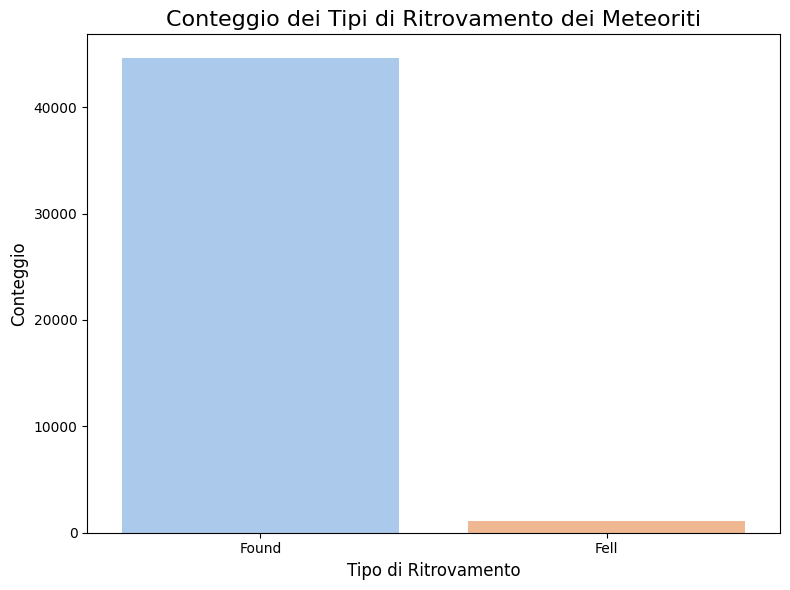

Grafico 2: Conteggio dei Tipi di Ritrovamento salvato come 'meteorite_fall_type_count.png'


In [9]:
# 2. Distribuzione del Tipo di Caduta/Ritrovamento (fall)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='fall', order=df_clean['fall'].value_counts().index, palette='pastel')
plt.title('Conteggio dei Tipi di Ritrovamento dei Meteoriti', fontsize=16)
plt.xlabel('Tipo di Ritrovamento', fontsize=12)
plt.ylabel('Conteggio', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('meteorite_fall_type_count.png')
plt.show()
print("Grafico 2: Conteggio dei Tipi di Ritrovamento salvato come 'meteorite_fall_type_count.png'")

C:\Users\Rosy\AppData\Local\Temp\ipykernel_24188\1854304991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='recclass', order=top_10_classes, palette='viridis')


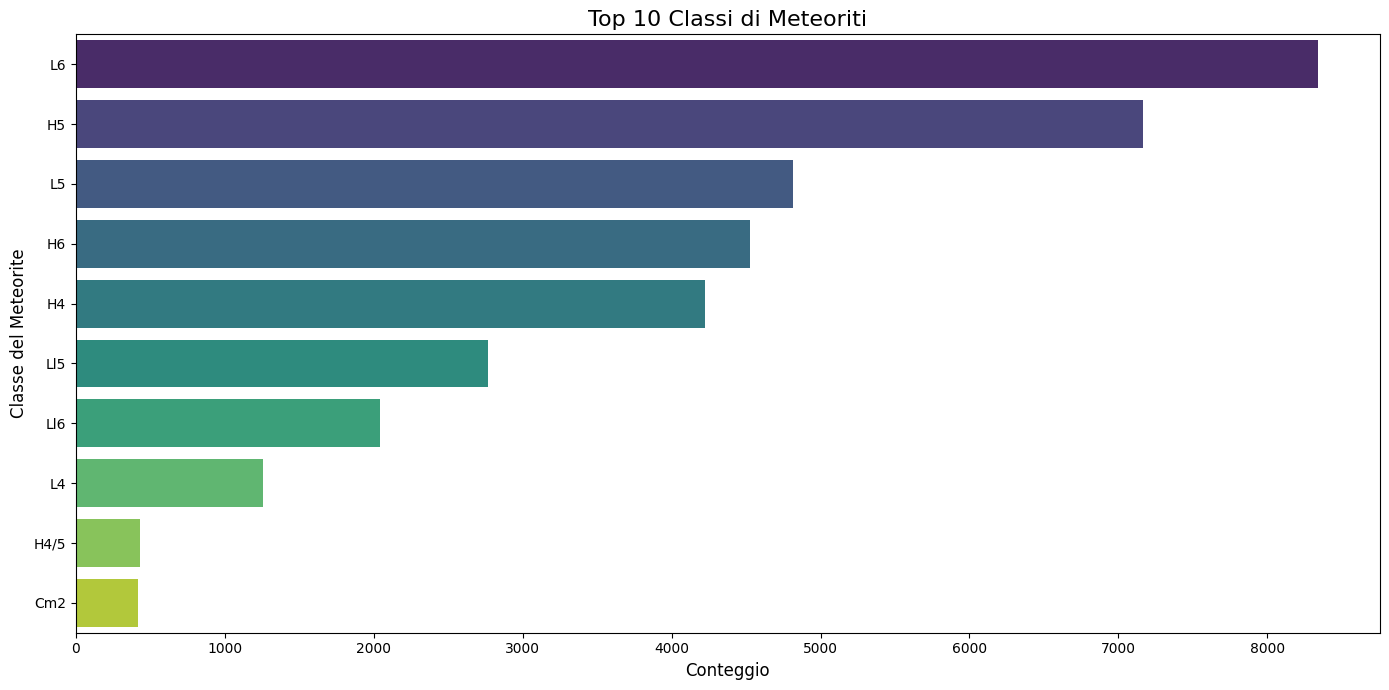

Grafico 3: Top 10 Classi di Meteoriti salvato come 'meteorite_top10_classes.png'


In [10]:
# 3. Top 10 Classi di Meteoriti (recclass)
top_10_classes = df_clean['recclass'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 7))
sns.countplot(data=df_clean, y='recclass', order=top_10_classes, palette='viridis')
plt.title('Top 10 Classi di Meteoriti', fontsize=16)
plt.xlabel('Conteggio', fontsize=12)
plt.ylabel('Classe del Meteorite', fontsize=12)
plt.tight_layout()
plt.savefig('meteorite_top10_classes.png')
plt.show()
print("Grafico 3: Top 10 Classi di Meteoriti salvato come 'meteorite_top10_classes.png'")

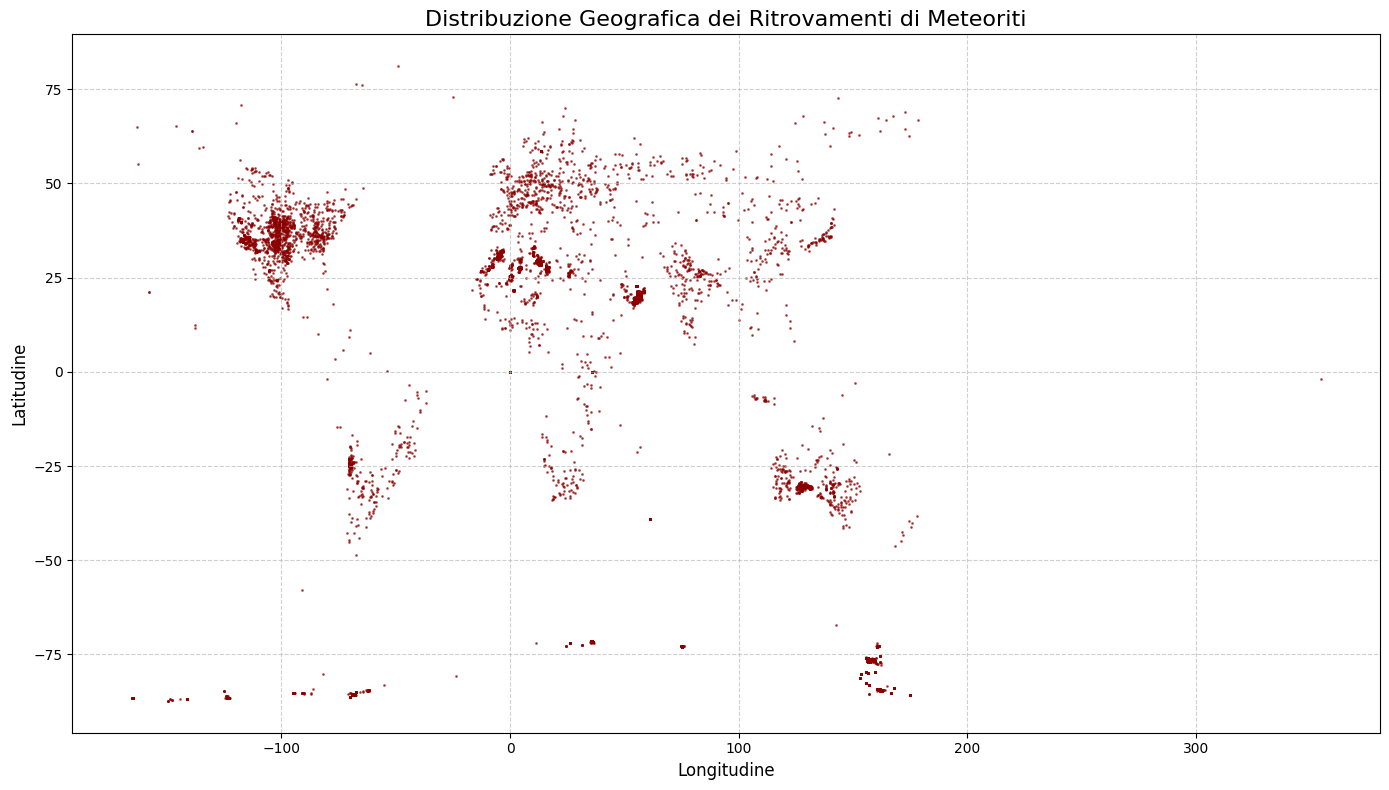

Grafico 4: Distribuzione Geografica salvato come 'meteorite_geographic_distribution.png'


In [11]:
# 4. Distribuzione Geografica (GeoLocation) - Scatter Plot
plt.figure(figsize=(14, 8))
plt.scatter(df_clean['reclong'], df_clean['reclat'], s=1, alpha=0.6, color='darkred')
plt.title('Distribuzione Geografica dei Ritrovamenti di Meteoriti', fontsize=16)
plt.xlabel('Longitudine', fontsize=12)
plt.ylabel('Latitudine', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('meteorite_geographic_distribution.png')
plt.show()
print("Grafico 4: Distribuzione Geografica salvato come 'meteorite_geographic_distribution.png'")

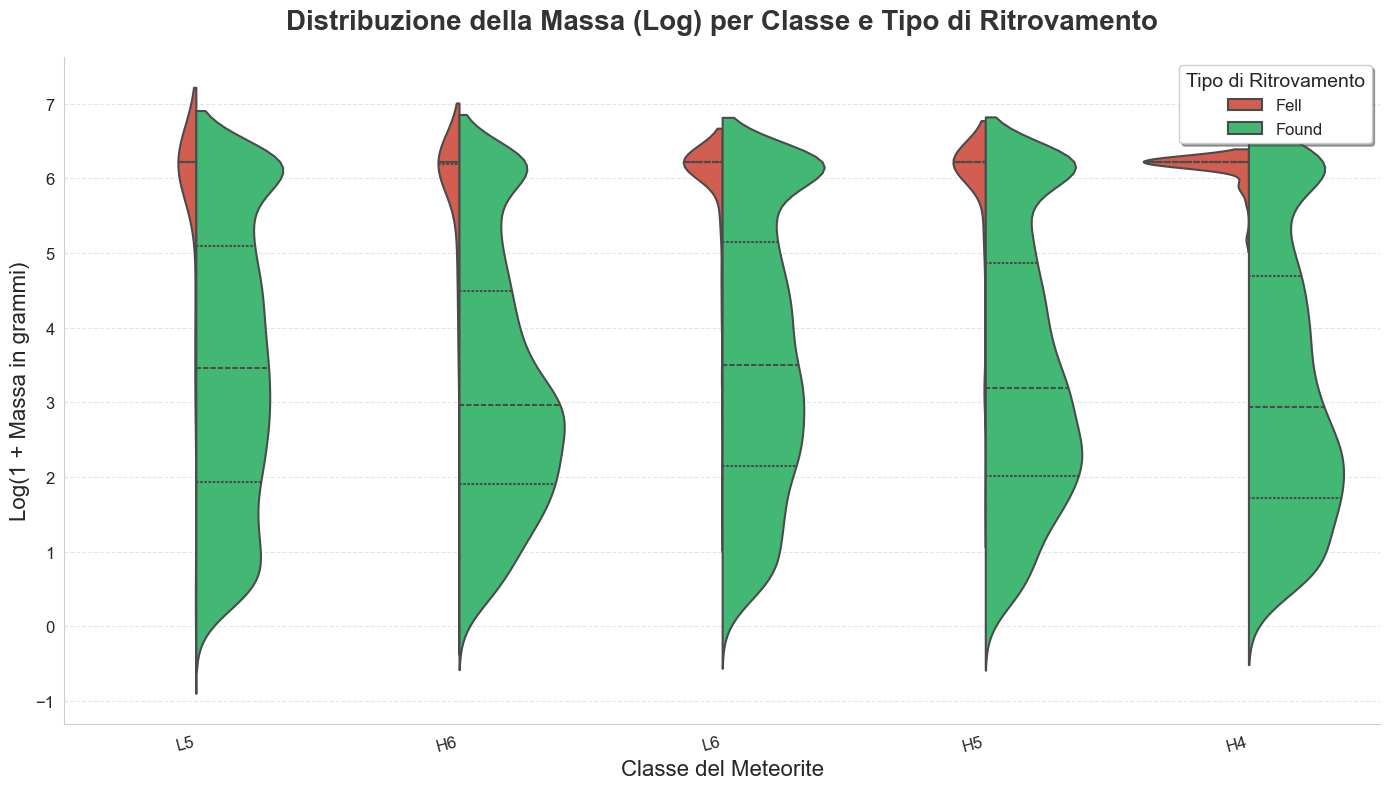

Il grafico 'eda_1_mass_distribution_violin_RED_GREEN.png' è stato generato con colori Rosso/Verde.


In [17]:
# Calcola il log della massa (aggiungendo 1 per gestire gli zeri)
df_clean['log_mass'] = np.log1p(df_clean['mass (g)'])

# Seleziona le top 5 classi di meteorite per mantenere il grafico leggibile
top_5_classes = df_clean['recclass'].value_counts().nlargest(5).index.tolist()
df_violin = df_clean[df_clean['recclass'].isin(top_5_classes)].copy()

# Imposta lo stile del grafico
sns.set_style("whitegrid")

# --- Generazione del Violin Plot con palette ROSSO e VERDE ---
plt.figure(figsize=(14, 8))
palette_colors = {'Found': '#2ECC71', 'Fell': '#E74C3C'} 

sns.violinplot(
    data=df_violin, 
    x='recclass', 
    y='log_mass', 
    hue='fall', 
    split=True, 
    inner='quartile', 
    palette=palette_colors, 
    linewidth=1.5
)

# Titoli e etichette d'impatto
plt.title(
    'Distribuzione della Massa (Log) per Classe e Tipo di Ritrovamento', 
    fontsize=20, 
    fontweight='bold', 
    pad=20,
    color='#333333' # Colore del titolo scuro per contrasto
)
plt.xlabel('Classe del Meteorite', fontsize=16)
plt.ylabel('Log(1 + Massa in grammi)', fontsize=16)

# Miglioramento della legenda
plt.legend(
    title='Tipo di Ritrovamento', 
    loc='upper right', 
    fontsize=12, 
    title_fontsize=14,
    frameon=True,
    shadow=True,
    facecolor='white'
)

# Ruota le etichette dell'asse x per chiarezza
plt.xticks(rotation=15, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Aggiunge un bordo e griglia per maggiore leggibilità
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('eda_1_mass_distribution_violin_RED_GREEN.png')
plt.show()
print("Il grafico 'eda_1_mass_distribution_violin_RED_GREEN.png' è stato generato con colori Rosso/Verde.")